In [31]:
import numpy as np
import pandas as pd
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('104403034_data_new.csv')

In [33]:
crossing_gk_list = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes'] 

In [34]:
df['sum'] = df[crossing_gk_list].sum(axis=1)
df.head()

,Unnamed: 0,index,Name,Age,Wage,Skill Moves,Height(cm),Weight(kg),Crossing,Finishing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,High,Medium,Low,sum
0,0,0,L. Messi,31,19775000,4.0,170.18,72.1224,84.0,95.0,...,26.0,6.0,11.0,15.0,14.0,8.0,0,1,0,2298.0
1,1,1,Cristiano Ronaldo,33,14175000,5.0,187.96,83.0088,84.0,94.0,...,23.0,7.0,11.0,15.0,14.0,11.0,1,0,1,2323.0
2,2,2,Neymar Jr,26,10150000,5.0,175.26,68.0400,79.0,87.0,...,33.0,9.0,9.0,15.0,15.0,11.0,1,1,0,2237.0
3,3,3,De Gea,27,9100000,1.0,193.04,76.2048,17.0,13.0,...,13.0,90.0,85.0,87.0,88.0,94.0,0,1,0,1539.0
4,4,4,K. De Bruyne,27,12425000,4.0,180.34,69.8544,93.0,82.0,...,51.0,15.0,13.0,5.0,10.0,13.0,1,0,0,2369.0


In [35]:
rating_avg = df['sum'].mean()
df['avg'] = df['sum'].apply(lambda x : 'Above-Average Players' if x >= rating_avg else 'Below-Average Players')

In [36]:
x = df.loc[:,['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']]
y = df.loc[:,['avg']]

In [37]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_class_label=le.fit_transform(y['avg'])

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y_class_label, test_size=0.33)

In [39]:
# Naive Bayes
NB_x_train = X_train.loc[:,['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']]
NB_x_test = X_test.loc[:,['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle']]

In [40]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(NB_x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [41]:
predicted = NB_model.predict(NB_x_test)

print("Naive Bayes Classification Report:")
print(metrics.classification_report(y_test, predicted))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3304
           1       0.96      0.83      0.89      2689

   micro avg       0.91      0.91      0.91      5993
   macro avg       0.92      0.90      0.90      5993
weighted avg       0.91      0.91      0.91      5993



In [42]:
NB_accuracy = metrics.accuracy_score(predicted, y_test)
print("Naive Bayes Accuracy:")
print(NB_accuracy)

Naive Bayes Accuracy:
0.9065576505923577


In [43]:
print("Naive Bayes Confusion Matrix:")
print(metrics.confusion_matrix(y_test, predicted))

Naive Bayes Confusion Matrix:
[[3201  103]
 [ 457 2232]]


In [44]:
# Decision Tree
from sklearn import tree
DT_model = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=10)
DT_model.fit(X_train,y_train)

DT_predicted = DT_model.predict(X_test)
print("Decision Tree Classification Report:")
print(metrics.classification_report(y_test, DT_predicted))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92      3304
           1       0.91      0.88      0.89      2689

   micro avg       0.91      0.91      0.91      5993
   macro avg       0.91      0.90      0.91      5993
weighted avg       0.91      0.91      0.91      5993



In [45]:
DT_accuracy = metrics.accuracy_score(DT_predicted, y_test)
print("Decision Tree Accuracy:")
print(DT_accuracy)

Decision Tree Accuracy:
0.9072250959452695


In [46]:
print("Decision Tree Confusion Matrix:")
print(metrics.confusion_matrix(y_test, DT_predicted))

Decision Tree Confusion Matrix:
[[3078  226]
 [ 330 2359]]


In [47]:
import graphviz

dot_data = tree.export_graphviz(DT_model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("tree") 

'tree.pdf'

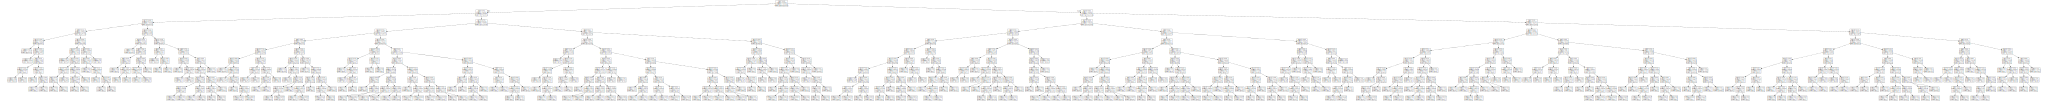

In [48]:
graph

In [49]:
# Logistic Regression
from sklearn import linear_model
LR_model = linear_model.LogisticRegression(solver='liblinear')
LR_model.fit(X_train,y_train)

LR_predicted = LR_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(metrics.classification_report(y_test, LR_predicted))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3304
           1       0.98      0.95      0.96      2689

   micro avg       0.97      0.97      0.97      5993
   macro avg       0.97      0.96      0.97      5993
weighted avg       0.97      0.97      0.97      5993



In [50]:
LR_accuracy = metrics.accuracy_score(LR_predicted, y_test)
print("Logistic Regression Accuracy:")
print(LR_accuracy)

Logistic Regression Accuracy:
0.9666277323544135


In [51]:
print("Logistic Regression Matrix:")
print(metrics.confusion_matrix(y_test, LR_predicted))

Logistic Regression Matrix:
[[3241   63]
 [ 137 2552]]


Text(0.5, 257.44, 'Predicted label')

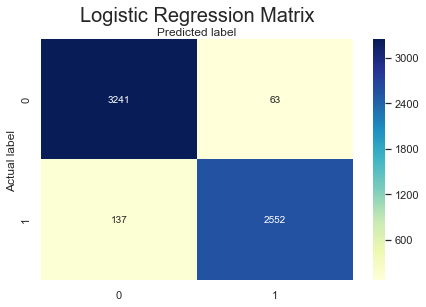

In [52]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,LR_predicted)

%matplotlib inline
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
ax.set_title(label='Logistic Regression Matrix', fontsize=20)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
# SVM
scaler = preprocessing.StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)

In [54]:
from sklearn.svm import SVC
SVM_model = SVC(kernel = 'linear')
SVM_model.fit(scaled_x_train, y_train)
SVM_predicted = SVM_model.predict(scaled_x_test)
print("SVM Classification Report:")
print(metrics.classification_report(y_test, SVM_predicted))

SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3304
           1       0.99      1.00      0.99      2689

   micro avg       1.00      1.00      1.00      5993
   macro avg       1.00      1.00      1.00      5993
weighted avg       1.00      1.00      1.00      5993



In [55]:
SVM_accuracy = metrics.accuracy_score(SVM_predicted, y_test)
print("SVM Accuracy:")
print(SVM_accuracy)

SVM Accuracy:
0.9954947438678459


In [56]:
print("SVM Matrix:")
print(metrics.confusion_matrix(y_test, SVM_predicted))

SVM Matrix:
[[3288   16]
 [  11 2678]]


In [57]:
#KNN
from sklearn.neighbors import NearestNeighbors
KNN_model = NearestNeighbors(n_neighbors=6)
KNN_model.fit(x)
m_c_n_x = x.iloc[0:3]
neighbors = KNN_model.kneighbors(m_c_n_x, return_distance=False) 
neighbors = neighbors.tolist()
print(neighbors)

[[0, 2, 15, 5, 154, 23], [1, 23, 10, 25, 33, 122], [2, 5, 0, 15, 157, 154]]


In [58]:
for i in range(len(neighbors[2])):
  player_id = neighbors[2][i]
  print(df.iloc[player_id]['Name'])
  
print()
for i in range(len(neighbors[0])):
  player_id = neighbors[0][i]
  print(df.iloc[player_id]['Name'])


Neymar Jr
E. Hazard
L. Messi
P. Dybala
Ronaldo Cabrais
A. Robben

L. Messi
Neymar Jr
P. Dybala
E. Hazard
A. Robben
S. Agüero


In [77]:
# ensemble learning
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [78]:
model = BaggingClassifier(random_state=0)
results = model_selection.cross_val_score(model, X_test, y_test, cv=10)
print(results.mean())

0.9365917815459806


In [79]:
rfc =RandomForestClassifier(random_state=0)
scores = model_selection.cross_val_score(rfc, X_test, y_test, cv=10)
print(scores.mean())

C:\Users\jyan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jyan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jyan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jyan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\jyan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: Future

0.9397654182090924


C:\Users\jyan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [81]:
ada =AdaBoostClassifier(n_estimators=10)
scores = model_selection.cross_val_score(ada, X_test, y_test, cv=10)
print(scores.mean())

0.9103931012854944
